In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, recall_score, f1_score, roc_curve, roc_auc_score
import pandas as pd
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
def plot_roc_curve(y_train, preds_train, y_test, preds_test):
    plt.plot(metrics.roc_curve(y_train, preds_train)[0], metrics.roc_curve(y_train, preds_train)[1],
             color = 'red', label='Train ROC Curve (area = %0.5f)' % roc_auc_score(y_train, preds_train))
    plt.plot(metrics.roc_curve(y_test, preds_test)[0],metrics.roc_curve(y_test, preds_test)[1],
             color = 'blue', label='Test ROC Curve (area = %0.5f)' % roc_auc_score(y_test, preds_test))
    plt.plot([0, 2], [0, 2], color='black', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC')
    plt.legend()
    plt.show()
    sns.set(style='white', rc={'figure.figsize':(10,10)})

In [3]:
def important_stats(y_true, y_pred_proba, summary):
    print("------------------------------------------")
    y_pred_label = pd.Series(y_pred_proba)
    y_pred_label = y_pred_label.map(lambda x: 1 if x > 0.5 else 0)
    print(summary)
    reacll = recall_score(y_true, y_pred_label)
    print('recall:', reacll)
    f1_stat = f1_score(y_true, y_pred_label)
    print('f1_score:', f1_stat)
    accuracyScore= accuracy_score(y_true, y_pred_label)
    print('accuracy_score:', accuracyScore)
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    print('AUC:', auc)
    matrix = pd.crosstab(y_true, y_pred_label, rownames=['True'], colnames=['Predicted'], margins=True)
    print(matrix)
    print("------------------------------------------")

In [4]:
df = pd.read_csv('c:/Users/14124/Desktop/cleaned_match_data.csv')

In [5]:
df.head()

,Unnamed: 0,match_id,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,...,tower_damage_std,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss
0,0,0,2375,1,1,3,2,2,0,2,...,2222.8977,100,24,16,3.0332,-414.2,0.0,-1056.0,507.4550,1
1,1,0,2375,0,-1,-3,-2,-2,0,-2,...,964.9754,84,19,12,2.6382,-668.4,0.0,-2240.0,884.9065,11
2,2,1,2582,0,-2,-2,-1,-2,-2,-2,...,625.7507,92,25,12,4.4091,-355.0,0.0,-1112.0,410.7768,10
3,3,1,2582,1,2,2,1,2,2,2,...,1980.6290,111,25,20,2.3152,-342.4,0.0,-1392.0,539.2356,2
4,4,2,2716,0,-1,-2,-1,-2,-2,0,...,540.7371,80,19,13,2.1909,0.0,0.0,0.0,0.0000,8


In [6]:
df.shape

(97340, 53)

In [7]:
df.dtypes

Unnamed: 0              int64
match_id                int64
duration                int64
result                  int64
top_towers              int64
mid_towers              int64
bottom_towers           int64
ancient_status          int64
top_barracks            int64
mid_barracks            int64
bottom_barracks         int64
gold_total              int64
gold_max                int64
gold_min                int64
gold_std              float64
gold_spent_avg        float64
gold_spent_max          int64
gold_spent_min          int64
gold_spent_std        float64
kills_total             int64
deaths_total            int64
deaths_max              int64
deaths_min              int64
deaths_std            float64
assists_avg           float64
assists_max             int64
assists_min             int64
assists_std           float64
denies_avg            float64
denies_max              int64
denies_min              int64
denies_std            float64
last_hits_avg         float64
last_hits_

In [8]:
df = df.drop(columns = ['match_id','Unnamed: 0'])

In [9]:
df.corr()

,duration,result,top_towers,mid_towers,bottom_towers,ancient_status,top_barracks,mid_barracks,bottom_barracks,gold_total,...,tower_damage_std,level_total,level_max,level_min,level_std,gold_buyback_avg,gold_buyback_max,gold_buyback_min,gold_buyback_std,teamfight_loss
duration,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230393,...,0.199976,0.867515,0.776659,0.780951,0.063224,-0.585446,-0.213387,-0.602820,0.582075,0.242865
result,0.000000,1.000000,0.780383,0.869118,0.825150,0.986854,0.809060,0.865912,0.942937,0.739364,...,0.747727,0.320451,0.318160,0.293043,0.059134,0.189747,0.061800,0.161707,-0.154202,-0.565127
top_towers,0.000000,0.780383,1.000000,0.807993,0.792817,0.790515,0.880296,0.752830,0.787292,0.548155,...,0.696751,0.278441,0.296039,0.246086,0.088415,0.141131,0.036464,0.121163,-0.118319,-0.517812
mid_towers,0.000000,0.869118,0.807993,1.000000,0.856399,0.880309,0.738982,0.801978,0.914213,0.613872,...,0.716737,0.324320,0.338086,0.292913,0.083000,0.142121,0.024963,0.131729,-0.133516,-0.609846
bottom_towers,0.000000,0.825150,0.792817,0.856399,1.000000,0.836555,0.735891,0.903572,0.836020,0.581170,...,0.718511,0.296908,0.312002,0.265209,0.084615,0.151632,0.039077,0.132218,-0.129588,-0.555111
ancient_status,0.000000,0.986854,0.790515,0.880309,0.836555,1.000000,0.817134,0.876071,0.955101,0.734006,...,0.756342,0.322183,0.321548,0.293756,0.062804,0.187248,0.054420,0.161586,-0.155769,-0.571964
top_barracks,0.000000,0.809060,0.880296,0.738982,0.735891,0.817134,1.000000,0.771422,0.793796,0.602863,...,0.711382,0.263630,0.268691,0.235660,0.066975,0.156431,0.043244,0.131539,-0.125817,-0.473552
mid_barracks,0.000000,0.865912,0.752830,0.801978,0.903572,0.876071,0.771422,1.000000,0.854986,0.643068,...,0.739327,0.288824,0.292350,0.260677,0.065643,0.169189,0.047936,0.144604,-0.139372,-0.519806
bottom_barracks,0.000000,0.942937,0.787292,0.914213,0.836020,0.955101,0.793796,0.854986,1.000000,0.697307,...,0.752436,0.321704,0.324197,0.292217,0.067838,0.175141,0.039243,0.156719,-0.154454,-0.580592
gold_total,0.230393,0.739364,0.548155,0.613872,0.581170,0.734006,0.602863,0.643068,0.697307,1.000000,...,0.627462,0.449840,0.421394,0.408975,0.054353,0.029177,-0.007021,0.016350,-0.021104,-0.376337


In [10]:
#Drop highly correlated features
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column]>0.6)]
df.drop(to_drop,axis=1,inplace=True)
df.head()

,duration,result,deaths_total,denies_avg,denies_min,level_std,gold_buyback_avg,gold_buyback_max
0,2375,1,17,6.0,1,3.0332,-414.2,0.0
1,2375,0,52,7.6,0,2.6382,-668.4,0.0
2,2582,0,53,5.4,0,4.4091,-355.0,0.0
3,2582,1,37,3.2,0,2.3152,-342.4,0.0
4,2716,0,49,2.0,0,2.1909,0.0,0.0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['result','duration']),
                                                    df['result'],
                                                    test_size=0.2,
                                                    random_state=1)

In [12]:
#x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

## XGBoost

In [13]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                      n_estimators=100, max_depth=3)
model = model.fit(x_train, y_train)
y_pred_test = model.predict_proba(x_test)[:, 1]
y_pred_train = model.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.6948395378690629
f1_score: 0.755829865668724
accuracy_score: 0.7754520238339839
AUC: 0.8536170174521718
Predicted      0      1    All
True                          
0          17910  13152  31062
1          18061  13049  31110
All        35971  26201  62172
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.6921810699588478
f1_score: 0.7533732713733834
accuracy_score: 0.7737312512841586
AUC: 0.8508951820443066
Predicted     0     1   All
True                       
0          1135   838  1973
1          1176   861  2037
All        2311  1699  4010
------------------------------------------


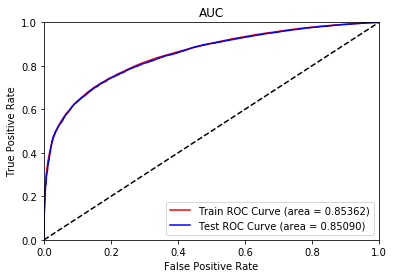

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GBDT

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0, n_estimators=10, max_depth=10)
model = model.fit(x_train, y_train)
y_pred_test = model.predict_proba(x_test)[:, 1]
y_pred_train = model.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7364056482670089
f1_score: 0.7927532026035404
accuracy_score: 0.8074147318676803
AUC: 0.8836461221049781
Predicted      0      1    All
True                          
0          17691  13371  31062
1          17675  13435  31110
All        35366  26806  62172
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7020576131687243
f1_score: 0.753575175307824
accuracy_score: 0.7707520032874461
AUC: 0.8472046497667138
Predicted     0     1   All
True                       
0          1120   853  1973
1          1139   898  2037
All        2259  1751  4010
------------------------------------------


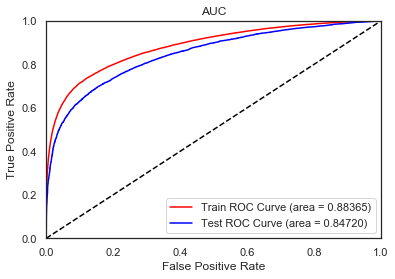

In [16]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)

## GridSearch

In [21]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.27145252, 1.78586459, 2.25352912, 2.66413021, 3.17012653,
         3.58163323, 3.93235583]),
  'std_fit_time': array([0.01744149, 0.06179192, 0.02784032, 0.01461649, 0.07008699,
         0.03152036, 0.04164874]),
  'mean_score_time': array([0.02692804, 0.03574533, 0.04388242, 0.0506927 , 0.05664845,
         0.06297431, 0.06734133]),
  'std_score_time': array([6.30977220e-04, 4.26867154e-04, 4.34000406e-06, 6.28039804e-04,
         7.46467613e-04, 1.89069291e-03, 4.50477404e-04]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.84822848, 0.8501402 , 0.85125766, 0.85173018, 0.85229508,
         0.85

In [23]:
param_test1 = {'n_estimators':range(80,151,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                               min_samples_leaf=20,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',iid=False,cv=5)
gsearch1.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([3.86701307, 4.35546417, 4.67442765, 4.91512284, 5.34928589,
         5.88603864, 6.28632789, 6.56611161]),
  'std_fit_time': array([0.07959827, 0.05475912, 0.04970578, 0.06745973, 0.10364477,
         0.02544051, 0.05568238, 0.11796423]),
  'mean_score_time': array([0.06711936, 0.07266846, 0.0767796 , 0.08131547, 0.08609109,
         0.0918509 , 0.09656796, 0.1015451 ]),
  'std_score_time': array([0.00067393, 0.00036763, 0.00032664, 0.00080279, 0.0006523 ,
         0.0008168 , 0.00076514, 0.00082543]),
  'param_n_estimators': masked_array(data=[80, 90, 100, 110, 120, 130, 140, 150],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 80},
   {'n_estimators': 90},
   {'n_estimators': 100},
   {'n_estimators': 110},
   {'n_estimators': 120},
   {'n_estimators': 130},
   {'n_estimators': 140},
   {'n_estimators': 150}],
  'split0_test_score': array([0.852

In [24]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100,801,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120, min_samples_leaf=20,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 2.475314  ,  2.45551057,  2.42406483,  2.44034982,  3.54350891,
          3.44729962,  3.39669685,  3.38224573,  5.0859858 ,  4.79370241,
          4.55924368,  4.31385207,  7.24167032,  6.27254448,  5.83318987,
          5.59696817, 10.01050239,  7.78842721,  7.05952921,  6.43108687,
         13.18770027,  9.04779339,  8.08556786,  7.52885747]),
  'std_fit_time': array([0.03432826, 0.02759454, 0.02033523, 0.01938522, 0.06249069,
         0.07803151, 0.06291057, 0.07761241, 0.07080361, 0.05117489,
         0.09110949, 0.08441707, 0.24895903, 0.06035572, 0.05418652,
         0.06475095, 0.19264731, 0.13478807, 0.05161093, 0.06588563,
         0.68227619, 0.14227565, 0.06703494, 0.13370923]),
  'mean_score_time': array([0.03978028, 0.03838868, 0.03855863, 0.03832264, 0.0565731 ,
         0.05629411, 0.05605016, 0.05585494, 0.07878661, 0.07791023,
         0.07583046, 0.07400594, 0.10232301, 0.09868937, 0.09595509,
         0.09523315, 0.12825441, 0.12112799, 0.

In [26]:
param_test3 = {'min_samples_leaf':range(60,101,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120,max_depth=7,
                                                               min_samples_split=700,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df.drop(columns = ['result','duration']),df['result'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([4.28054767, 4.36133165, 4.42057309, 4.41299343, 4.35335312]),
  'std_fit_time': array([0.08821045, 0.14305244, 0.06121869, 0.07646474, 0.09934531]),
  'mean_score_time': array([0.07499928, 0.07519875, 0.07599673, 0.07619615, 0.0769937 ]),
  'std_score_time': array([0.00097744, 0.00048854, 0.00039895, 0.00048856, 0.00039887]),
  'param_min_samples_leaf': masked_array(data=[60, 70, 80, 90, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 60},
   {'min_samples_leaf': 70},
   {'min_samples_leaf': 80},
   {'min_samples_leaf': 90},
   {'min_samples_leaf': 100}],
  'split0_test_score': array([0.85364489, 0.85312491, 0.85342736, 0.85336656, 0.85324267]),
  'split1_test_score': array([0.8562873 , 0.85550684, 0.8561399 , 0.85594652, 0.856218  ]),
  'split2_test_score': array([0.85232764, 0.85278165, 0.85216334, 0.85252303, 0.8525058 ]),
  'split3_test_score': array([0.8

In [27]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=120,max_depth=7, min_samples_leaf =60, 
                                  min_samples_split =700, max_features='sqrt', subsample=0.8, random_state=10)
gbm1.fit(df.drop(columns = ['result','duration']),df['result'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=60, min_samples_split=700,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
y_pred_test = gbm1.predict_proba(x_test)[:, 1]
y_pred_train = gbm1.predict_proba(x_train)[:, 1]
important_stats(y_train, y_pred_train, "train result summary: ")
important_stats(y_test, y_pred_test, "test result summary: ")

------------------------------------------
train result summary: 
recall: 0.7147368421052631
f1_score: 0.7672739299396412
accuracy_score: 0.7831312923772344
AUC: 0.8638708581377231
Predicted      0      1    All
True                          
0          17638  13424  31062
1          17550  13560  31110
All        35188  26984  62172
------------------------------------------
------------------------------------------
test result summary: 
recall: 0.7145061728395061
f1_score: 0.7671066438393991
accuracy_score: 0.7833881241010889
AUC: 0.8644232656777966
Predicted     0     1   All
True                       
0          1114   859  1973
1          1151   886  2037
All        2265  1745  4010
------------------------------------------


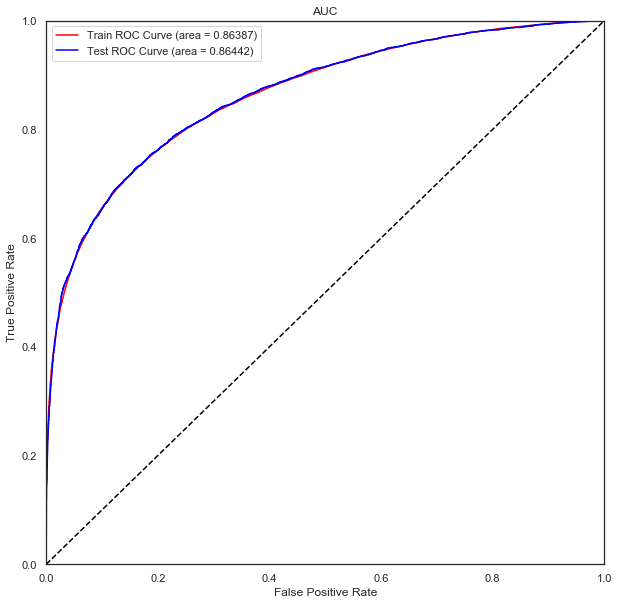

In [29]:
plot_roc_curve(y_train, y_pred_train, y_test, y_pred_test)